# **Analysis and Forecasting of ADHD Assessment Demand and Service Strain in England (2019–2024)**

## Project Narrative

This project analyses historical ADHD referral data from NHS England to evaluate statistically significant growth trends, assess indicators of service strain, and develop an interpretable predictive model to forecast future demand for ADHD assessments.

Recent NHS management information reports substantial increases in ADHD referrals and individuals awaiting assessment, highlighting growing pressures on mental health services (NHS Digital, 2025). National clinical guidance emphasises the importance of timely diagnosis and access to evidence-based treatment for individuals with ADHD, underscoring the need for effective service planning and capacity management (NICE, 2018).

By applying statistical analysis and supervised machine learning techniques to official NHS data, this project aims to generate evidence-based insights that may support healthcare commissioners and policy stakeholders in understanding demand trajectories and anticipating future service needs.


## Project Motivation

Attention Deficit Hyperactivity Disorder (ADHD) is a neurodevelopmental condition characterised by persistent patterns of inattention, hyperactivity, and impulsivity, which can significantly affect educational, occupational, and social functioning (NICE, 2018). Prevalence estimates suggest that approximately 3–5% of the population may meet diagnostic criteria for ADHD, indicating substantial potential demand for assessment services (UK Parliament Commons Library, 2025).

Recent NHS publications report increasing numbers of individuals awaiting ADHD assessments and rising referral volumes year-on-year, raising concerns regarding service capacity and long waiting times (NHS Digital, 2025). The Independent ADHD Taskforce has further highlighted systemic pressures within diagnostic pathways and the need for improved planning and resource allocation (NHS England, 2024).

Given these developments, quantitative analysis of referral trends and waiting indicators is essential to determine whether observed increases are statistically significant and whether current trajectories suggest sustained or escalating service strain. This project seeks to contribute to that understanding through structured statistical analysis and predictive modelling.


## Project Objectives

**Primary Objective**

To analyse historical ADHD referral demand in England, evaluate service strain indicators, and develop a predictive model to forecast future assessment demand.

**Secondary Objectives**

- Identify whether ADHD referral volumes have increased significantly over time.
- Compare referral levels and growth trends across age groups.
- Analyse long-wait referral categories as indicators of system strain.
- Develop and evaluate a supervised machine learning model to forecast referral demand.
- Design an interactive dashboard to communicate insights clearly to healthcare stakeholders.


## Research Questions

**Research question 1:** Has ADHD referral demand increased significantly over time in England between April 2019 and February 2024?

**Research question 2:** Do mean open ADHD referral counts differ significantly across age groups in England?

**Research question 3:** Has the proportion of ADHD referrals waiting more than 52 weeks increased significantly over time?

**Research question 4:** Can future ADHD referral demand be predicted with acceptable forecasting accuracy using supervised machine learning?


## Hypothesis Testing Framework

Significance level for all statistical tests:  
α = 0.05

### Hypothesis 1 – Growth Trend in Referrals  
H₁: There is a statistically significant positive relationship between reporting month and open ADHD referral counts.  
H₀: There is no statistically significant relationship between reporting month and open ADHD referral counts.

### Hypothesis 2 – Age Group Differences  
H₁: There is a statistically significant difference in mean open ADHD referral counts across age groups.  
H₀: There is no statistically significant difference in mean open ADHD referral counts across age groups.

### Hypothesis 3 – Long Wait Service Strain  
H₁: There is a statistically significant positive relationship between reporting month and the proportion of ADHD referrals waiting more than 52 weeks.  
H₀: There is no statistically significant relationship between reporting month and the proportion of ADHD referrals waiting more than 52 weeks.


## Analytical Workflow

- Load the raw NHS ADHD referral dataset
- Clean and standardise variables
- Handle suppressed values appropriately
- Convert date variables to datetime format
- Construct structured time-series datasets
- Perform descriptive statistical analysis
- Conduct hypothesis testing (Regression & ANOVA)


## Inputs

- Raw dataset: data/raw/MHSDS_historic.csv
- Python libraries: pandas, numpy, matplotlib, seaborn, scipy, statsmodels
- NHS ADHD indicator definitions (data dictionary)


## Outputs

- Cleaned and standardised dataframe
- Structured monthly time-series datasets:
     - total_ts (total referrals)
     - age_ts (age-group monthly referrals)
     - strain_ts (52+ week proportion)
- Descriptive statistics and visualisations
- Statistical test results:
    - Linear regression outputs (H1 & H3)
    - ANOVA results (H2)


## Additional Comments

This notebook establishes the analytical foundation for the project by preparing structured datasets and conducting statistical testing prior to predictive modelling. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Shazia Mujahid\\Documents\\adhd-nhs-demand\\adhd-demand-forecast-england\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Shazia Mujahid\\Documents\\adhd-nhs-demand\\adhd-demand-forecast-england'

# Section 1. Data Loading & Initial Inspection

In this section, the raw NHS ADHD referral dataset is loaded and inspected to understand its structure, column names, data types, and overall completeness before performing any cleaning operations.

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/raw/MHSDS_historic.csv")

# Preview first 5 rows
df.head()

,REPORTING_PERIOD_START_DATE,REPORTING_PERIOD_END_DATE,INDICATOR_ID,AGE_GROUP,VALUE
0,01/02/2024,29/02/2024,ADHD003,0 to 4,1695
1,01/02/2024,29/02/2024,ADHD003,18 to 24,57760
2,01/02/2024,29/02/2024,ADHD003,25+,129075
3,01/02/2024,29/02/2024,ADHD003,5 to 17,105355
4,01/02/2024,29/02/2024,ADHD003,Unknown,15


In [6]:
# Inspect structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   REPORTING_PERIOD_START_DATE  5609 non-null   object
 1   REPORTING_PERIOD_END_DATE    5609 non-null   object
 2   INDICATOR_ID                 5609 non-null   object
 3   AGE_GROUP                    5609 non-null   object
 4   VALUE                        5609 non-null   object
dtypes: object(5)
memory usage: 219.2+ KB


In [7]:
# Summary statistics
df.describe()

,REPORTING_PERIOD_START_DATE,REPORTING_PERIOD_END_DATE,INDICATOR_ID,AGE_GROUP,VALUE
count,5609,5609,5609,5609,5609
unique,59,59,21,5,2137
top,01/09/2021,30/09/2021,ADHD003,18 to 24,*
freq,102,102,295,1217,610


### Initial Observations

- The dataset contains 5,609 rows and 5 columns.
- No missing (null) values are present.
- All variables are currently stored as object (string) types.
- The VALUE column contains suppressed entries marked with "*", which must be handled before numeric analysis.
- Date columns require conversion to datetime format.

---

# Section 2. Data Cleaning & Type Conversion

In this section, data types are corrected, suppressed values are handled, and the dataset is prepared for time-series modelling.

In [8]:
# Convert date columns to datetime
df["REPORTING_PERIOD_START_DATE"] = pd.to_datetime(df["REPORTING_PERIOD_START_DATE"])
df["REPORTING_PERIOD_END_DATE"] = pd.to_datetime(df["REPORTING_PERIOD_END_DATE"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   REPORTING_PERIOD_START_DATE  5609 non-null   datetime64[ns]
 1   REPORTING_PERIOD_END_DATE    5609 non-null   datetime64[ns]
 2   INDICATOR_ID                 5609 non-null   object        
 3   AGE_GROUP                    5609 non-null   object        
 4   VALUE                        5609 non-null   object        
dtypes: datetime64[ns](2), object(3)
memory usage: 219.2+ KB


C:\Users\Shazia Mujahid\AppData\Local\Temp\ipykernel_23368\3169897354.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["REPORTING_PERIOD_END_DATE"] = pd.to_datetime(df["REPORTING_PERIOD_END_DATE"])


In [9]:
# Count suppressed values
(df["VALUE"] == "*").sum()

610

In [10]:
import numpy as np

# Replace suppressed values with NaN
df["VALUE"] = df["VALUE"].replace("*", np.nan)

# Convert VALUE to numeric
df["VALUE"] = pd.to_numeric(df["VALUE"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   REPORTING_PERIOD_START_DATE  5609 non-null   datetime64[ns]
 1   REPORTING_PERIOD_END_DATE    5609 non-null   datetime64[ns]
 2   INDICATOR_ID                 5609 non-null   object        
 3   AGE_GROUP                    5609 non-null   object        
 4   VALUE                        4999 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 219.2+ KB


### Handling Suppressed Values

The VALUE column contained 610 suppressed entries marked with "*", representing small counts withheld for confidentiality reasons in NHS reporting.

These entries were replaced with NaN and excluded from numeric modelling to ensure analytical validity and avoid introducing bias through incorrect imputation.

In [11]:
# Identify all indicator codes present to ensure the dataset contains ADHD003 (referral measure of interest)
df["INDICATOR_ID"].unique()

array(['ADHD003', 'ADHD003a', 'ADHD003b', 'ADHD003c', 'ADHD003d',
       'ADHD004', 'ADHD004a', 'ADHD004b', 'ADHD004c', 'ADHD004d',
       'ADHD005', 'ADHD005a', 'ADHD005b', 'ADHD005c', 'ADHD005d',
       'ADHD006', 'ADHD006a', 'ADHD006b', 'ADHD006c', 'ADHD006d',
       'ADHD007'], dtype=object)

In [12]:
# Filter dataset to include only ADHD003 (total referral measure)
df = df[df["INDICATOR_ID"] == "ADHD003"].copy()

# Confirm filtering worked
df["INDICATOR_ID"].unique()

array(['ADHD003'], dtype=object)

In [13]:
# Rename columns for clarity and modelling
df = df.rename(columns={
    "REPORTING_PERIOD_START_DATE": "period_start",
    "REPORTING_PERIOD_END_DATE": "period_end",
    "AGE_GROUP": "age_group",
    "VALUE": "value"
})

In [14]:
# Confirm structure after filtering
df.head()

,period_start,period_end,INDICATOR_ID,age_group,value
0,2024-01-02,2024-02-29,ADHD003,0 to 4,1695.0
1,2024-01-02,2024-02-29,ADHD003,18 to 24,57760.0
2,2024-01-02,2024-02-29,ADHD003,25+,129075.0
3,2024-01-02,2024-02-29,ADHD003,5 to 17,105355.0
4,2024-01-02,2024-02-29,ADHD003,Unknown,15.0


---

# Section 3. Feature Engineering & Time Series Structuring

In this section, the cleaned ADHD003 dataset is transformed into structured time-series datasets suitable for statistical testing and forecasting.

In [15]:
# Create total monthly referrals (all age groups combined)
total_ts = (
    df.groupby("period_end", as_index=False)["value"]
      .sum()
      .sort_values("period_end")
)

total_ts.head()

,period_end,value
0,2019-04-30,30730.0
1,2019-05-31,33245.0
2,2019-06-30,36060.0
3,2019-07-31,39690.0
4,2019-08-31,39815.0


In [16]:
# Create age-group monthly dataset
age_ts = (
    df.groupby(["period_end", "age_group"], as_index=False)["value"]
      .sum()
      .sort_values(["period_end", "age_group"])
)

age_ts.head()

,period_end,age_group,value
0,2019-04-30,0 to 4,595.0
1,2019-04-30,18 to 24,5065.0
2,2019-04-30,25+,9435.0
3,2019-04-30,5 to 17,15615.0
4,2019-04-30,Unknown,20.0


In [17]:
# Filter dataset to include only referrals open for 52+ weeks
# ADHD003c = 52–104 weeks
# ADHD003d = 104+ weeks
# These combined represent long-wait referrals (>52 weeks)
long_wait_df = df[df["INDICATOR_ID"].isin(["ADHD003c", "ADHD003d"])].copy()

In [18]:
# Aggregate long-wait referrals to monthly national totals
# This creates a structured time-series dataset for RQ3 analysis
long_wait_ts = (
    long_wait_df.groupby("period_end", as_index=False)["value"]
    .sum()
    .sort_values("period_end")
)

In [19]:
# Merge total referrals with long-wait totals
# This allows calculation of the proportion of referrals waiting >52 weeks
strain_ts = total_ts.merge(
    long_wait_ts,
    on="period_end",
    how="left",
    suffixes=("_total", "_52plus")
)

In [20]:
# Replace any missing long-wait counts with 0 (no long waits recorded that month)
strain_ts["value_52plus"] = strain_ts["value_52plus"].fillna(0)

# Calculate proportion of referrals waiting >52 weeks
# This standardises long waits relative to total referral demand
strain_ts["prop_52plus"] = (
    strain_ts["value_52plus"] / strain_ts["value_total"]
)

---

# Section 4. Descriptive Statistical Analysis and Hypothesis Testing

This section presents descriptive statistical analysis and formal hypothesis testing to evaluate temporal trends, age-group differences, and service strain indicators within NHS ADHD referral data.

Descriptive analysis is first conducted to summarise central tendencies, variability, and visual trends in referral demand. This is followed by inferential statistical testing aligned with the predefined research questions and hypotheses.

Statistical methods applied in this section include:

- Simple linear regression to assess time-based growth trends (RQ1)
- One-way ANOVA to compare mean referral counts across age groups (RQ2)
- Linear regression to evaluate changes in long-wait proportions over time (RQ3)

All statistical tests are conducted at a significance level of α = 0.05.

In [26]:
# Import required libraries for descriptive statistical analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 4.1 Descriptive Overview of Referral Trends

This section presents a descriptive analysis of national ADHD assessment referral demand in England between 2019 and 2024. Monthly total referrals (aggregated across all age groups) are examined to identify overall trends, growth patterns, variability, and potential seasonality within the study period.

The purpose of this section is to establish a clear empirical understanding of how referral demand has evolved over time before proceeding to formal hypothesis testing in Section 4.2. Summary statistics, annual comparisons, and time-series visualisations are used to provide an evidence-based overview of demand trajectory.

In [22]:
# Create a clean copy of the total monthly referral dataset
# This avoids modifying the original object created in Section 3
ref_ts = total_ts.copy()

# Rename 'value' column to something clearer for interpretation
# This improves readability for statistical analysis and reporting
ref_ts = ref_ts.rename(columns={"value": "total_referrals"})

# Ensure chronological ordering of the time series
ref_ts = ref_ts.sort_values("period_end")

# Display first few rows to confirm structure
ref_ts.head()

,period_end,total_referrals
0,2019-04-30,30730.0
1,2019-05-31,33245.0
2,2019-06-30,36060.0
3,2019-07-31,39690.0
4,2019-08-31,39815.0


In [23]:
# Calculate additional time-series metrics to support analysis

# Absolute month-to-month change in referrals
ref_ts["abs_change"] = ref_ts["total_referrals"].diff()

# Percentage month-to-month change
ref_ts["pct_change"] = ref_ts["total_referrals"].pct_change() * 100

# 3-month moving average
# This smooths short-term volatility to reveal underlying trend
ref_ts["ma_3"] = ref_ts["total_referrals"].rolling(3).mean()

# Extract year component for annual aggregation
ref_ts["year"] = ref_ts["period_end"].dt.year

# Preview dataset
ref_ts.head()

,period_end,total_referrals,abs_change,pct_change,ma_3,year
0,2019-04-30,30730.0,NaN,NaN,NaN,2019
1,2019-05-31,33245.0,2515.0,8.184185,NaN,2019
2,2019-06-30,36060.0,2815.0,8.467439,33345.000000,2019
3,2019-07-31,39690.0,3630.0,10.066556,36331.666667,2019
4,2019-08-31,39815.0,125.0,0.314941,38521.666667,2019


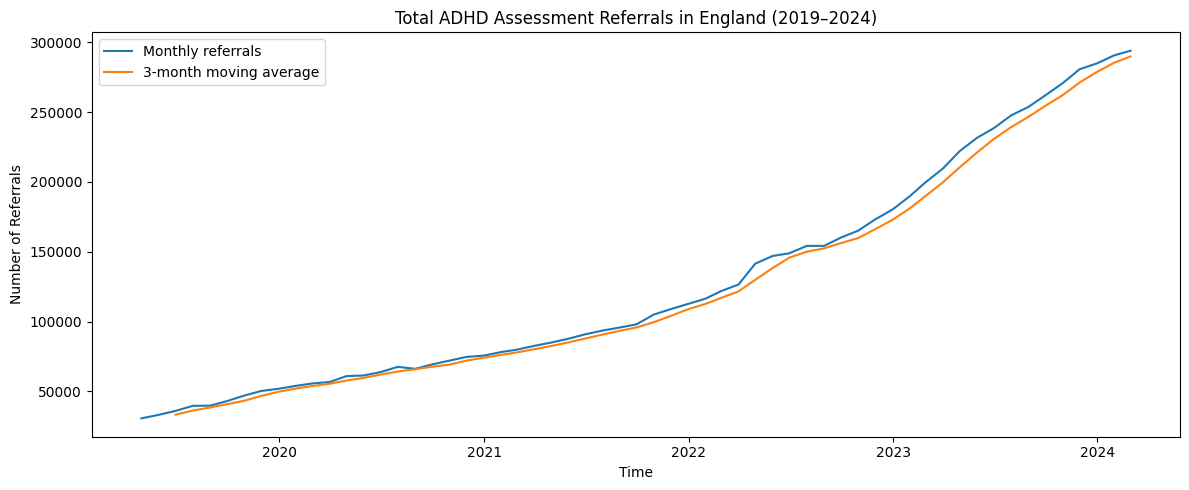

In [ ]:
# Plot total monthly referrals with moving average smoothing
# This provides a descriptive overview of demand trajectory

plt.figure(figsize=(12,5))

# Plot raw monthly referral counts
plt.plot(ref_ts["period_end"],
         ref_ts["total_referrals"],
         label="Monthly referrals")

# Plot smoothed 3-month moving average
plt.plot(ref_ts["period_end"],
         ref_ts["ma_3"],
         label="3-month moving average")

# Add labels and title for clarity
plt.title("Total ADHD Assessment Referrals in England (2019–2024)")
plt.xlabel("Time")
plt.ylabel("Number of Referrals")
plt.legend()

plt.tight_layout()
plt.show()

The time-series visualisation demonstrates a pronounced upward trajectory in ADHD assessment referrals between 2019 and early 2024. Monthly referrals increased from approximately 30,730 in April 2019 to nearly 294,000 by February 2024, representing a substantial rise in demand over the study period.

While early years show moderate month-to-month variability, the slope of the curve steepens considerably from 2022 onwards, indicating accelerated growth in referral volumes. The three-month moving average closely follows the raw trend, confirming that the increase reflects a sustained structural shift rather than short-term volatility.

In [ ]:
# Generate summary descriptive statistics for referral demand
ref_ts["total_referrals"].describe()

count        59.000000
mean     127662.881356
std       78768.256692
min       30730.000000
25%       64997.500000
50%       98040.000000
75%      176662.500000
max      293900.000000
Name: total_referrals, dtype: float64

In [28]:
# Calculate coefficient of variation (CV)
# CV standardises variability relative to the mean

cv = ref_ts["total_referrals"].std() / ref_ts["total_referrals"].mean()
cv

0.6170020279587443

Summary statistics further confirm the scale of change in referral demand. Across the study period, the average monthly referral volume was approximately 127,663 cases, with a standard deviation of 78,768. The large dispersion relative to the mean (coefficient of variation ≈ 0.62) reflects substantial growth and variability over time.

The minimum observed monthly referral count was 30,730 (2019), while the maximum reached 293,900 (2024), highlighting the magnitude of the upward shift in demand across the period.

In [29]:
# Aggregate referrals by calendar year
# This enables comparison of annual growth patterns


annual_summary = (
    ref_ts
    .groupby("year")["total_referrals"]
    .agg(["count",      # number of months
          "sum",        # total annual referrals
          "mean",       # average monthly referrals
          "std",        # variability within year
          "min",        # minimum month
          "max"])       # maximum month
    .reset_index()
)

# Calculate year-on-year percentage change in total annual referrals
annual_summary["annual_yoy_%"] = annual_summary["sum"].pct_change() * 100

annual_summary

,year,count,sum,mean,std,min,max,annual_yoy_%
0,2019,9,371960.0,41328.888889,7412.240627,30730.0,51910.0,NaN
1,2020,12,778065.0,64838.750000,7319.084992,54005.0,75620.0,109.179751
2,2021,12,1117925.0,93160.416667,11343.567953,78150.0,112620.0,43.680155
3,2022,12,1789015.0,149084.583333,19919.270416,116365.0,180190.0,60.029966
4,2023,12,2890645.0,240887.083333,31323.124224,189785.0,284820.0,61.577460
5,2024,2,584500.0,292250.000000,2333.452378,290600.0,293900.0,-79.779599


Annual aggregation reveals consistent and accelerating growth in ADHD referral demand. Total annual referrals increased each year across the study period, rising from 778,065 in 2020 to 2,890,645 in 2023.

The rate of increase appears to intensify over time, with particularly sharp growth observed between 2021 and 2023. This pattern suggests not only increasing demand but accelerating system pressure in recent years.

In [30]:
# Identify months with highest recorded referral volumes
ref_ts.nlargest(5, "total_referrals")[
    ["period_end", "total_referrals"]
]

,period_end,total_referrals
58,2024-02-29,293900.0
57,2024-01-31,290600.0
56,2023-12-31,284820.0
55,2023-11-30,280625.0
54,2023-10-31,270715.0


The five highest recorded monthly referral volumes all occur in late 2023 and early 2024, indicating that referral demand reached its highest observed levels during the most recent period of the dataset. The clustering of peak months toward the end of the study window reinforces the interpretation of sustained upward momentum rather than isolated or short-lived spikes.

In [31]:
# Identify largest absolute month-to-month increases
ref_ts.nlargest(5, "abs_change")[
    ["period_end", "abs_change"]
]

,period_end,abs_change
36,2022-04-30,14940.0
48,2023-04-30,12500.0
46,2023-02-28,9915.0
55,2023-11-30,9910.0
47,2023-03-31,9840.0


The largest month-to-month increases in referral demand occur predominantly in 2022 and 2023, indicating that growth is not only sustained but intensifying in the later years of the study period. The biggest increase was observed in April 2022 (+14,940 referrals), followed by April 2023 (+12,500). Additional sharp rises throughout 2023 (e.g., February, March, and November) further support the interpretation of accelerated demand in recent years.

Importantly, these increases are substantially larger in magnitude than the largest observed decreases, suggesting that short-term fluctuations do not alter the overall upward trajectory.

In [32]:
# Identify largest absolute month-to-month decreases
ref_ts.nsmallest(5, "abs_change")[
    ["period_end", "abs_change"]
]

,period_end,abs_change
16,2020-08-31,-1430.0
40,2022-08-31,5.0
4,2019-08-31,125.0
13,2020-05-31,480.0
20,2020-12-31,935.0


Although minor month-to-month decreases are observed (e.g., August 2020), these reductions are small relative to the magnitude of subsequent increases. The overall pattern remains strongly upward, with positive changes substantially outweighing temporary declines.

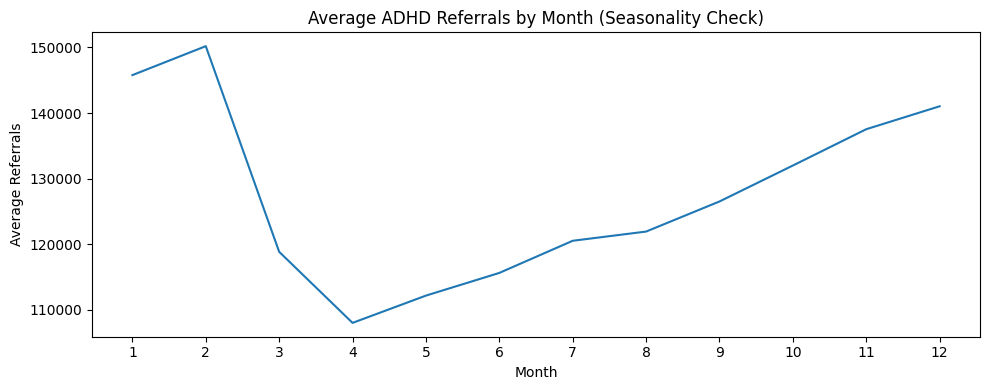

In [33]:
# Examine potential seasonal patterns in referral demand

# Extract month number
ref_ts["month"] = ref_ts["period_end"].dt.month

# Calculate average referrals per month across all years
seasonal = (
    ref_ts
    .groupby("month")["total_referrals"]
    .mean()
    .reset_index()
)

# Plot seasonal averages
plt.figure(figsize=(10,4))

plt.plot(seasonal["month"],
         seasonal["total_referrals"])

plt.title("Average ADHD Referrals by Month (Seasonality Check)")
plt.xlabel("Month")
plt.ylabel("Average Referrals")
plt.xticks(range(1,13))

plt.tight_layout()
plt.show()

Examination of average monthly referrals suggests the presence of mild seasonal variation. Referral volumes appear higher in the early months of the year (January–February), decline around March–April, and gradually increase again toward year-end. However, the magnitude of seasonal fluctuation is modest compared to the overall upward time trend.

Overall, the descriptive analysis indicates a clear and accelerating upward trend in ADHD assessment referral demand across the study period. While visual inspection and summary statistics strongly suggest a structural increase over time, formal statistical testing is required to determine whether this trend is statistically significant.

Section 4.2 therefore applies linear regression modelling to evaluate whether referral demand has increased significantly over time and to quantify the magnitude of this effect.